In [27]:
# system library
import os
import sys
import json

# useful libraries
import math
import operator
import itertools
import statistics
import collections
from collections import Counter
from collections import OrderedDict
import scikitplot as skplt
# pandas
import pandas as pd
from scikitplot.metrics import plot_roc
from sklearn.model_selection import train_test_split, cross_val_score 

from sklearn.metrics import accuracy_score, f1_score, classification_report
from sklearn.metrics import roc_curve, auc, roc_auc_score
# numpy
import numpy as np
from numpy import std
from numpy import mean
from numpy import percentile

# visualisarion
import pydotplus
import seaborn as sns
from matplotlib import colors
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from IPython.display import Image

# sklearn
import sklearn
from sklearn.pipeline import FeatureUnion
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
from sklearn.metrics import classification_report, confusion_matrix

# dimensional reducers
from sklearn.decomposition import PCA
from sklearn.feature_selection import RFE
from sklearn.feature_selection import RFECV
from sklearn.decomposition import TruncatedSVD
from sklearn.feature_selection import VarianceThreshold
from sklearn.feature_selection import SelectKBest, f_classif, mutual_info_classif  # classification
from sklearn.feature_selection import SelectKBest, f_regression, mutual_info_regression  # regression

# scalers
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import MaxAbsScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import KBinsDiscretizer
from sklearn.preprocessing import OneHotEncoder

# performance visualisation 
from sklearn import tree
from scikitplot.metrics import plot_roc
from sklearn.metrics import roc_auc_score
from scikitplot.metrics import plot_precision_recall
from scikitplot.metrics import plot_cumulative_gain
from scikitplot.metrics import plot_lift_curve
from sklearn.model_selection import learning_curve
from mlxtend.plotting import plot_decision_regions
from yellowbrick.model_selection import LearningCurve

# tree classifiers
from sklearn.tree import DecisionTreeClassifier

# linear classifiers
from sklearn.linear_model import LassoCV
from sklearn.linear_model import Perceptron
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression

# neighbors classifiers
from sklearn.neighbors import KNeighborsClassifier

# naive_bayes classifiers
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import MultinomialNB

# ensemble classifiers
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier

# svm
from sklearn.svm import SVC
from sklearn.svm import LinearSVC

plt.rcParams["patch.force_edgecolor"] = True
%matplotlib inline

from yellowbrick.style import set_palette
set_palette('bold')

# Parametri globali

- solver{‘newton-cg’, ‘lbfgs’, ‘liblinear’, ‘sag’, ‘saga’}, default=’lbfgs’ Algoritmo utilizzato per ottimizzare il problema 
   - per problemi multiclasse = ‘newton-cg’, ‘sag’, ‘saga’ and ‘lbfgs’ handle multinomial loss
   - per piccoli datasets ‘liblinear’, mentre per grandi dataset ‘sag’ e ‘saga’ are sono più veloci;
   - ‘liblinear’ is limited to one-versus-rest schemes.
   
Scelto saga perché è l'unico che permette tutti i tipi di regolarizzazione

Prefer dual=False when n_samples > n_features.

   




In [28]:
n_iter = 10
scoring = 'f1_weighted'
random_state = 42

# test_n_splits = 9
test_n_splits = 3

model = LogisticRegression(random_state=42,  n_jobs=-1, solver = 'saga',dual = False) 
# model = SVC(random_state=random_state, kernel='linear', probability=True, max_iter=1000)  
model_name = "LogisticRegression"

learning_curve_flag = False
v_or_t_flag = "TST"
cmap = plt.cm.YlOrBr_r
color = "brown"

# Data loading & partitioning

In [29]:
train = pd.read_csv('../data/reduced_cleaned_files/train_reduced_cleaned_4.csv')
X_train = train.drop(['Activity'], axis=1)

y_train = train['Activity']
y_train = pd.DataFrame(y_train)
print('X_train and y_train : ({},{})'.format(X_train.shape, y_train.shape))

X_train and y_train : ((7261, 200),(7261, 1))


In [30]:
X_test = pd.read_csv('../data/reduced_files/X_test_reduced_UFS.csv')
y_test = pd.read_csv('../data/csv_files/y_test.csv')
#X_train = train.drop(['subject', 'Activity','ActivityName'], axis=1)

#y_train = train['Activity']
#y_train = pd.DataFrame(y_train)
print('X_test and y_test : ({},{})'.format(X_test.shape, y_test.shape))

X_test and y_test : ((2947, 200),(2947, 1))


In [31]:
X_tr = X_train.copy()
y_tr = y_train.copy()
X_ts = X_test.copy()
y_ts = y_test.copy()

print(X_tr.shape, X_ts.shape)
print(y_tr.shape, y_ts.shape)

(7261, 200) (2947, 200)
(7261, 1) (2947, 1)


# Logistic regression (baseline)

In [32]:
def model_baseline_classification(X_tr, y_tr, X_ts, y_ts):
    fitted_model = model.fit(X_tr, y_tr.values.ravel())
    y_pred = model.predict(X_ts)
    
    print(confusion_matrix(y_ts, y_pred))
    print(classification_report(y_ts, y_pred))
    

    #plot_classification_report(y_ts.values.ravel(), y_pred)
    
    try:
        features_importance = sorted(zip(X_tr.columns, fitted_model.feature_importances_),reverse=True)
        # print(features_importance)
    except:
        pass
    
    try:
        features_importance = sorted(zip(X_tr.columns, fitted_model.coef_),reverse=True)
        # print(features_importance)
    except:
        pass

In [33]:
model_baseline_classification(X_train, 
                              y_train, 
                              X_test, 
                              y_test)

[[494   0   2   0   0   0]
 [ 42 423   6   0   0   0]
 [  3  11 406   0   0   0]
 [  0   5   0 407  79   0]
 [  2   1   0  22 507   0]
 [  0   2   1   0  25 509]]
              precision    recall  f1-score   support

           1       0.91      1.00      0.95       496
           2       0.96      0.90      0.93       471
           3       0.98      0.97      0.97       420
           4       0.95      0.83      0.88       491
           5       0.83      0.95      0.89       532
           6       1.00      0.95      0.97       537

    accuracy                           0.93      2947
   macro avg       0.94      0.93      0.93      2947
weighted avg       0.94      0.93      0.93      2947



C:\Users\info\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


# Tuned Logistic Regression

In [34]:
def model_grid(X_tr):
    grid = dict()
    grid['model__penalty'] = ['l1', 'l2', 'elasticnet']
    grid['model__tol'] = [0.00001, 0.0001, 0.001, 0.01, 0.1, 1.0]
    grid['model__C'] = [0.001, 0.01, 1.0, 10.0, 50.0, 100.0]
    grid['model__class_weight'] = [None, 'balanced']
    grid['model__multi_class'] = ['auto', 'ovr', 'multinomial']
    return grid

In [35]:
# PLOT FUNCTIONS
def plot_roc_curve(y_ts, y_prob):
    plt.figure(figsize=(8, 5))
    plot_roc(y_ts, y_prob)
    plt.title("%s\'s %s ROC curve" % (model_name, v_or_t_flag.upper()))
    plt.show()
    
def plot_precision_recall_curve(y_ts, y_prob):
    plt.figure(figsize=(8, 5))
    plot_precision_recall(y_ts, y_prob)
    plt.title("%s\'s %s Precision-Recall curve" % (model_name, v_or_t_flag.upper()))
    plt.show()
    
def plot_cumulative_gain_curve(y_ts, y_prob):
    plt.figure(figsize=(8, 5))
    plot_cumulative_gain(y_ts, y_prob)
    plt.title("%s\'s %s Cumulative Gains curve" % (model_name, v_or_t_flag.upper()))
    plt.show()
    
def plot_lift_curve_curve(y_ts, y_prob):
    plt.figure(figsize=(8, 5))
    plot_lift_curve(y_ts, y_prob)
    plt.title("%s\'s %s Lift curve" % (model_name, v_or_t_flag.upper()))
    plt.show()
    
def plot_confusion_matrix(cm, classes, normalize):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title("%s\'s %s classification report" % (model_name, v_or_t_flag.upper()))
    # plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes)
    plt.yticks(tick_marks, classes)
    
    plt.grid(False)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()
    
def plot_classification_report(y_ts, y_pred):
    model_report = classification_report(y_ts, 
                                       y_pred,
                                       # target_names=['Studio Recording', 'Live Recording'],
                                       output_dict=True)
    model_r = pd.DataFrame(model_report).iloc[:-1, :].T
    sns.heatmap(model_r, annot=True, cmap=cmap, cbar=False)
    plt.title("%s\'s %s confusion matrix" % (model_name, v_or_t_flag.upper()))
    plt.show()
    
def plot_decision_boundary(X_tr, y_tr, scaler, model):
    try:
        pca = PCA(n_components=2)
        best_visualisation_scaler = StandardScaler()
        scaled_X_tr = best_visualisation_scaler.fit_transform(X_tr)
        X = pca.fit_transform(scaled_X_tr)
        # X = pca.fit_transform(X_tr)
        y = y_tr.values.ravel()

        model.fit(X, y)
        plt.figure(figsize=(8, 5))
        fig = plot_decision_regions(X=X, y=y, clf=model, legend=2)
        plt.xlabel("PCA component 1")
        plt.ylabel("PCA component 2")
        plt.title("%s's %s decision boundary" % (model_name, v_or_t_flag))
        plt.legend(loc='best')
        plt.grid(False)
        plt.show()
    except ValueError:
        return

def spot_errors(test_label, test_pred):  
    spot_errors = []
    label_errors = []
    for i in range(len(test_label)):
        if test_label[i] != test_pred[i]:
            spot_errors.append('darkred')
            label_errors.append("wrong prediction")
        else:
            spot_errors.append('darkgray')
            label_errors.append("correct prediction")
    return spot_errors, label_errors

def classification_visualizer(test_set, test_label, test_pred):
    test_label = test_label.values
    
    f, axs = plt.subplots(nrows=1, ncols=3, figsize=(24,8))
    errors, label_errors = spot_errors(test_label, test_pred)
    labels = [test_label, test_pred, errors]
    titles = ['True Labels', 'Predicted Labels', 'Misclassifications']
    
    for i in range(0, 3):
        axs[i].scatter(test_set[missclassif_column_name1], test_set[missclassif_column_name2], c=labels[i], cmap='cividis')
        axs[i].set_title(titles[i])
        axs[i].set_xlabel(missclassif_column_name1, fontdict={'fontsize': 'large'})
        axs[i].set_ylabel(missclassif_column_name2, fontdict={'fontsize': 'large'})
        
    plt.suptitle('Visualization of the ' + model_name + ' classifier on the %s' % v_or_t_flag)
    plt.show()
    

def error_visualizer(test_set, test_label, test_pred, column_name1, column_name2):
    test_label = test_label.values
    errors, label_errors = spot_errors(test_label, test_pred)
    
    palette = ['darkgray', 'darkred']
    if errors[0] == 'darkred':
        palette = ['darkred', 'darkgray']
    
    fig = plt.figure(figsize=(5, 6))
    sns.scatterplot(x=test_set[column_name1], y=test_set[column_name2], hue=label_errors, palette=palette)
    plt.title('%s\'s %s misclassifications' % (model_name, v_or_t_flag))
    plt.xlabel(column_name1)
    plt.ylabel(column_name2)

    plt.legend()
    plt.show()
    
def plot_learning_curve(X_tr, y_tr, model, v_or_t_flag):
    second_score = ""
    if v_or_t_flag == 'VAL':
        cv = StratifiedKFold(n_splits=validation_n_splits)
        second_score = "Validation score"
    else:
        cv = StratifiedKFold(n_splits=test_n_splits)
        second_score = "Test score"
    sizes = np.linspace(0.3, 1.0, 10)
    plt.figure(figsize=(8, 5))
    visualizer = LearningCurve(model, cv=cv, scoring=scoring, train_sizes=sizes, 
                                                                       n_jobs=-1, random_state=random_state)

    visualizer.fit(X_tr, y_tr.values.ravel())    
    # visualizer.ax.get_lines()[1].set_label(second_score)
    visualizer.show() 

def get_tuned_model(X_tr, y_tr, params):
    
    X_tr_curr = X_tr.copy()
    
    model_params = list(model_grid(X_tr_curr).keys())
    try:
        n_bins = params['preprocessor__numeric__discretizer__n_bins'] 
        strategy = params['preprocessor__numeric__discretizer__strategy']
        encode = params['preprocessor__numeric__discretizer__encode']
        discretizer = KBinsDiscretizer(encode=encode, n_bins=n_bins, strategy=strategy)
        # scale data
        X_tr_curr = discretizer.fit_transform(X_tr_curr.values)
    except KeyError:
        pass

    try:
        scaler = params['preprocessor__numeric__discretizer__scaler']
        # scale data
        X_tr_curr = scaler.fit_transform(X_tr_curr.values)
    except KeyError:
        pass
    
    # retrieve best hyperameters
    tmp_model_hyperparameters = dict((k, params[k]) for k in model_params if k in params)
    model_hyperparameters = {}
    for key, value in tmp_model_hyperparameters.items():
        key = key.split('model__')[1].replace("'", "")
        model_hyperparameters[key] = value
        
    tuned_model =  model.set_params(**model_hyperparameters)
    tuned_model.fit(X_tr_curr, y_tr.values.ravel())
    
    plot_decision_boundary(X_tr_curr, y_tr, MinMaxScaler(), tuned_model)  # passing random scaler
    
    if learning_curve_flag:
        plot_learning_curve(curr_X_tr_vt, y_tr, tuned_model, v_or_t_flag)
    
    return tuned_model

def grid_search(X_tr, y_tr, X_ts, y_ts, numeric_features, categorical_features, discretizer_flag, 
                                                            scaler_flag, feature_filter_key, feature_flag):
    
    # define the evaluation method
    cv = StratifiedKFold(n_splits=test_n_splits)

    # construct the pipeline to evaluate
    # scaler = RobustScaler()
    grid=model_grid(X_tr)
    steps = [('model', model)]
        
    #if feature_filter_key == 'anova':
        #anova = SelectKBest(score_func=f_classif)
        #steps.insert(0, ('anova', anova))
        #grid['anova__k'] = [i+1 for i in range(X_tr.shape[1])]
    #elif feature_filter_key == 'rfe':
        #rfe = RFE(estimator=DecisionTreeClassifier())
        #steps.insert(0, ('rfe', rfe))
        #grid['rfe__estimator'] = [DecisionTreeClassifier(), LogisticRegression(max_iter=10000)]
        #grid['rfe__n_features_to_select'] = [i+1 for i in range(X_tr.shape[1])]
    
    # construct feature type's column transformer
    numeric_steps = []
    if scaler_flag:      # continous variable normalisation/standardisation
        numeric_steps.insert(0, ('scaler', None))
        grid['preprocessor__numeric__scaler'] = [MinMaxScaler(), MaxAbsScaler(), StandardScaler(), RobustScaler()]
                      
    if discretizer_flag:  # continous variable binning
        numeric_steps.insert(0, ('discretizer', KBinsDiscretizer(encode='ordinal')))  # ordinal bins
        grid['preprocessor__numeric__discretizer__n_bins'] = list(range(2, 11))
        grid['preprocessor__numeric__discretizer__strategy'] = ['uniform', 'quantile', 'kmeans']
        
    numeric_transformer = None
    if len(numeric_steps) > 0:
        numeric_transformer = Pipeline(steps=numeric_steps)
        preprocessor = ColumnTransformer(
        transformers=[('numeric', numeric_transformer, numeric_features)])
        # add numeric ColumnTransformer to global Pipeline
        steps.insert(0, ('preprocessor', preprocessor))
        
    # define the pipeline to evaluate
    pipeline = Pipeline(steps=steps)
    
    # define the grid search
    # search = GridSearchCV(pipeline, grid, scoring='f1_weighted', n_jobs=-1, cv=cv, verbose=2)
    search = RandomizedSearchCV(pipeline, grid, scoring=scoring, n_jobs=-1, 
                                n_iter=n_iter, cv=cv, verbose=2, refit=scoring, random_state=random_state)
    
    
    
    # perform the search
    results = search.fit(X_tr, y_tr.values.ravel())
    
    # summarize best
    score = results.best_score_
    params = results.best_params_
    print('Best Mean F1_weighted: %.3f ' % score)
    print('Best Config: %s ' % params)
    
    # perform classification (linear model doesn't predict an integer value => no predict_proba)
    y_pred = search.predict(X_ts)
    y_prob = search.predict_proba(X_ts)
    y_prob1 = search.decision_function(X_ts)
    
    best_features, best_features_scores = [], []
    if feature_filter_key != "":
        best_features, best_features_scores = get_best_features_grid_cv(X_tr, y_tr, results, feature_filter_key)
        X_tr = X_tr[best_features]
    
    # retrieve the tuned model
    tuned_model = get_tuned_model(X_tr, y_tr, params)
    if tuned_model !=  pipeline['model']:
        print("Difference in tuned model and pipeline")
        print("tuned_model", tuned_model)
        print("pipe", pipeline['model'])
        # print("estimator", results.estimator)
        sys.exit(-1)
        
    print("coef_", pipeline['model'].coef_)
    print("intercept_", pipeline['model'].intercept_)
    #print("roc", roc_auc_score(y_ts.values.ravel(), y_pred, average="weighted"))
    #sklearn.metrics.plot_roc_curve(results, X_ts, y_ts.values.ravel())     
    skplt.metrics.plot_roc(y_ts, y_prob1)
   
    plt.show()
    
    # plots
    if feature_flag and (feature_filter_key == ""):
        best_features, best_features_scores = get_feature_importances_or_coef(X_tr, y_tr, tuned_model)
    elif (feature_flag) and (feature_filter_key != ""):
        _ , _ = get_feature_importances_or_coef(X_tr, y_tr, tuned_model)
 
    
    cm = confusion_matrix(y_ts, y_pred.round())
    plot_confusion_matrix(cm, [1,2,3,4,5,6], True)
    plot_classification_report(y_ts.values.ravel(), y_pred)
    
    """plot_roc_curve(y_ts, y_prob)
    plot_precision_recall_curve(y_ts, y_prob)
    plot_cumulative_gain_curve(y_ts, y_prob)
    plot_lift_curve_curve(y_ts, y_prob)"""
    
    # plot_decision_boundary(X_tr, y_tr, MinMaxScaler(), tuned_model)  # passing random scaler
    # plot_learning_curve(X_tr, y_tr, tuned_model)
    # error_visualizer(not_scale_X_ts, y_ts, y_pred, 'chroma_cens_02', 'track_duration')
    
    return params, tuned_model, y_pred, y_prob, best_features, best_features_scores

Fitting 3 folds for each of 10 candidates, totalling 30 fits


C:\Users\info\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
12 fits failed out of a total of 30.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
12 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\info\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\info\anaconda3\lib\site-packages\sklearn\pipeline.py", line 394, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "C:\Users\info\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1471, in fit
    raise ValueError(
ValueError: l1_ratio must be between

Best Mean F1_weighted: 0.926 
Best Config: {'preprocessor__numeric__scaler': MaxAbsScaler(), 'model__tol': 0.001, 'model__penalty': 'l1', 'model__multi_class': 'auto', 'model__class_weight': None, 'model__C': 100.0} 


C:\Users\info\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\info\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\info\anaconda3\lib\site-packages\mlxtend\plotting\decision_regions.py:274: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(x=x_data,


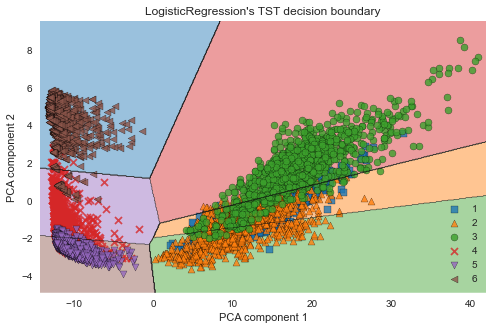

coef_ [[ 0.86306693 -1.06013251]
 [ 0.89496745 -1.65476891]
 [ 0.60227606  1.41376824]
 [-0.78120929  0.6798535 ]
 [-0.88248408 -2.17092537]
 [-0.69661704  2.7922434 ]]
intercept_ [-0.52672298 -1.70054834  2.65500894  2.91940062 -3.79647548  0.44933723]


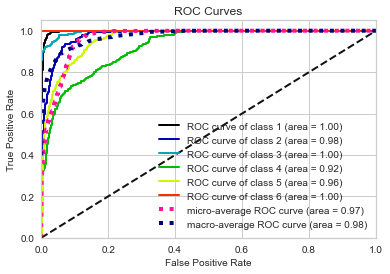

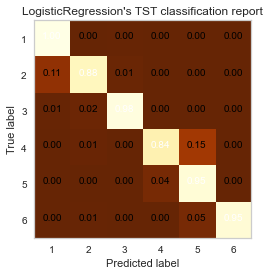

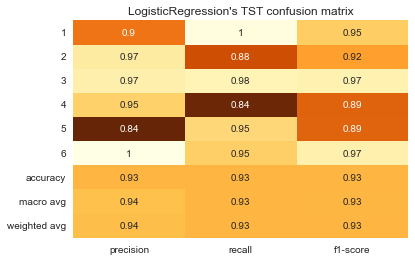

In [36]:
params_tst, tuned_model_tst, y_pred_tst, y_prob_tst, best_features, best_features_scores = \
                                                    grid_search(X_tr=X_tr, 
                                                                y_tr=y_tr,
                                                                X_ts=X_ts, 
                                                                y_ts=y_ts,
                                                                numeric_features=X_train.columns, 
                                                                categorical_features=X_train.columns, 
                                                                discretizer_flag=False,
                                                                scaler_flag=True, 
                                                                feature_filter_key="", 
                                                                feature_flag=False)

In [37]:
tuned_model_tst

LogisticRegression(C=100.0, n_jobs=-1, penalty='l1', random_state=42,
                   solver='saga', tol=0.001)

In [38]:
def plot_learning_curve(X_tr, y_tr, model, v_or_t_flag):
    second_score = ""
    if v_or_t_flag == 'VAL':
        cv = StratifiedKFold(n_splits=validation_n_splits)
        second_score = "Validation score"
    else:
        cv = StratifiedKFold(n_splits=test_n_splits)
        second_score = "Test score"
        
    my_title = model_name + "'s %s Learning Curve" % (v_or_t_flag) 
        
    sizes = np.linspace(0.3, 1.0, 10)
    plt.figure(figsize=(8, 5))
    visualizer = LearningCurve(model, cv=cv, scoring=scoring, train_sizes=sizes, 
                                                        n_jobs=-1, random_state=random_state, title=my_title)

    visualizer.fit(X_tr, y_tr.values.ravel())    
    # visualizer.ax.get_lines()[1].set_label(second_score)
    visualizer.show() 

dict_keys(['ax', 'cv', 'estimator', 'exploit_incremental_learning', 'groups', 'n_jobs', 'pre_dispatch', 'random_state', 'scoring', 'shuffle', 'train_sizes', 'C', 'class_weight', 'dual', 'fit_intercept', 'intercept_scaling', 'l1_ratio', 'max_iter', 'multi_class', 'penalty', 'solver', 'tol', 'verbose', 'warm_start']) 


dict_keys(['ax', 'cv', 'estimator', 'exploit_incremental_learning', 'groups', 'n_jobs', 'pre_dispatch', 'random_state', 'scoring', 'shuffle', 'train_sizes', 'C', 'class_weight', 'dual', 'fit_intercept', 'intercept_scaling', 'l1_ratio', 'max_iter', 'multi_class', 'penalty', 'solver', 'tol', 'verbose', 'warm_start']) 


dict_keys(['ax', 'cv', 'estimator', 'exploit_incremental_learning', 'groups', 'n_jobs', 'pre_dispatch', 'random_state', 'scoring', 'shuffle', 'train_sizes', 'C', 'class_weight', 'dual', 'fit_intercept', 'intercept_scaling', 'l1_ratio', 'max_iter', 'multi_class', 'penalty', 'solver', 'tol', 'verbose', 'warm_start']) 


dict_keys(['ax', 'cv', 'estimator', 'exp

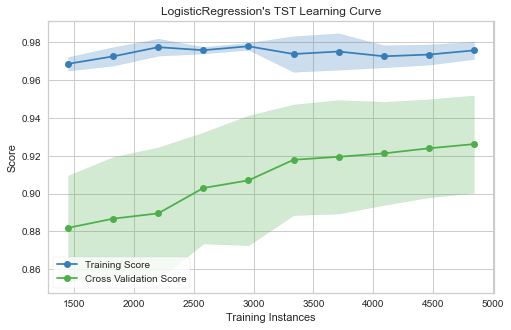

In [39]:
v_or_t_flag = "TST"
plot_learning_curve(X_train, 
                    y_train, 
                    tuned_model_tst, 
                    v_or_t_flag)

## Numero minimo di dati

- If your 'X' value is between 60% and 70%, it's a poor model. 
- If your 'X' value is between 70% and 80%, you've got a good model. 
- If your 'X' value is between 80% and 90%, you have an excellent model. 
- If your 'X' value is between 90% and 100%, it's a probably an overfitting case

Numero minimo di dati necessari per poter ottenere performance accettabili: 1385 con un acc = 75 e F1 = 73

In [40]:
def selezione_righe(train, activity, perc):
    df = train[train['Activity'] == activity]
    lista_righe = df[:perc].index.tolist()
    
    return lista_righe

In [41]:
# riduzione del 90% == 887
riduzione = [50, 100,300,400,500,600, 700, 800, 850, 900, 950, 960, 970, 980,  1000]
for r in riduzione:
    print('--------------------------------------------')
    train_num = train.copy()
    print(train_num.shape)
    
    print('eliminate', r)

    lista_righe = selezione_righe(train_num,1,r)
    train_num.drop(lista_righe,axis=0,inplace=True)
    lista_righe = selezione_righe(train_num,2,r)
    train_num.drop(lista_righe,axis=0,inplace=True)
    lista_righe = selezione_righe(train_num,3,r)
    train_num.drop(lista_righe,axis=0,inplace=True)
    lista_righe = selezione_righe(train_num,4,r)
    train_num.drop(lista_righe,axis=0,inplace=True)
    lista_righe = selezione_righe(train_num,5,r)
    train_num.drop(lista_righe,axis=0,inplace=True)
    lista_righe = selezione_righe(train_num,6,r)
    train_num.drop(lista_righe,axis=0,inplace=True)

    print(train_num.shape)

    X_train_num = train_num.drop(['Activity'], axis=1)

    y_train_num = train_num['Activity']
    y_train_num = pd.DataFrame(y_train_num)
    print('X_train and y_train : ({},{})'.format(X_train_num.shape, y_train_num.shape))
    
    
    fitted_model = model.fit(X_train_num, y_train_num.values.ravel())
    y_pred = model.predict(X_test)
    
    print('Accuracy %s' % accuracy_score(y_test, y_pred))
    print('F1-score %s' % f1_score(y_test, y_pred, average='weighted'))

--------------------------------------------
(7261, 201)
eliminate 50
(6961, 201)
X_train and y_train : ((6961, 200),(6961, 1))


C:\Users\info\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Accuracy 0.9311163895486936
F1-score 0.9311724554808019
--------------------------------------------
(7261, 201)
eliminate 100
(6661, 201)
X_train and y_train : ((6661, 200),(6661, 1))


C:\Users\info\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Accuracy 0.9321343739395996
F1-score 0.9321353427662511
--------------------------------------------
(7261, 201)
eliminate 300
(5461, 201)
X_train and y_train : ((5461, 200),(5461, 1))


C:\Users\info\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Accuracy 0.9348489989820156
F1-score 0.9347037520632293
--------------------------------------------
(7261, 201)
eliminate 400
(4861, 201)
X_train and y_train : ((4861, 200),(4861, 1))


C:\Users\info\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Accuracy 0.9368849677638276
F1-score 0.9365131820912271
--------------------------------------------
(7261, 201)
eliminate 500
(4261, 201)
X_train and y_train : ((4261, 200),(4261, 1))


C:\Users\info\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Accuracy 0.9317950458092976
F1-score 0.9314346747730489
--------------------------------------------
(7261, 201)
eliminate 600
(3661, 201)
X_train and y_train : ((3661, 200),(3661, 1))


C:\Users\info\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Accuracy 0.9212758737699356
F1-score 0.9212809008515724
--------------------------------------------
(7261, 201)
eliminate 700
(3061, 201)
X_train and y_train : ((3061, 200),(3061, 1))


C:\Users\info\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Accuracy 0.9253478113335596
F1-score 0.9249547272042649
--------------------------------------------
(7261, 201)
eliminate 800
(2461, 201)
X_train and y_train : ((2461, 200),(2461, 1))


C:\Users\info\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Accuracy 0.9202578893790295
F1-score 0.919811194913206
--------------------------------------------
(7261, 201)
eliminate 850
(2161, 201)
X_train and y_train : ((2161, 200),(2161, 1))


C:\Users\info\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Accuracy 0.9155072955548015
F1-score 0.9149420588404062
--------------------------------------------
(7261, 201)
eliminate 900
(1861, 201)
X_train and y_train : ((1861, 200),(1861, 1))


C:\Users\info\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Accuracy 0.9138106549032915
F1-score 0.9134587530363143
--------------------------------------------
(7261, 201)
eliminate 950
(1561, 201)
X_train and y_train : ((1561, 200),(1561, 1))


C:\Users\info\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Accuracy 0.8785205293518833
F1-score 0.8763651640286009
--------------------------------------------
(7261, 201)
eliminate 960
(1501, 201)
X_train and y_train : ((1501, 200),(1501, 1))


C:\Users\info\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Accuracy 0.7645062775704106
F1-score 0.7495551792787145
--------------------------------------------
(7261, 201)
eliminate 970
(1441, 201)
X_train and y_train : ((1441, 200),(1441, 1))


C:\Users\info\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Accuracy 0.7533084492704445
F1-score 0.7383321893958474
--------------------------------------------
(7261, 201)
eliminate 980
(1385, 201)
X_train and y_train : ((1385, 200),(1385, 1))


C:\Users\info\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Accuracy 0.675602307431286
F1-score 0.6213695278385057
--------------------------------------------
(7261, 201)
eliminate 1000
(1285, 201)
X_train and y_train : ((1285, 200),(1285, 1))
Accuracy 0.670851713607058
F1-score 0.6149203009180735


C:\Users\info\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
